# Task 3: Build and Evaluate Models Regression

## Import Libraries

In [109]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.style
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

import scipy
from math import sqrt

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

## Reading Dataset using Pandas

In [110]:
credit=pd.read_csv('default of credit card clients.csv', header=1)

## Analysis Data

In [111]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [112]:
credit["default"]=credit['default payment next month']

In [113]:
credit=credit.drop(['ID','default payment next month'], axis=1)

In [114]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [115]:
credit=credit.drop_duplicates()

In [116]:
null=credit.isnull().sum()
null

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [117]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29965 non-null  int64 
 1   SEX        29965 non-null  object
 2   EDUCATION  29965 non-null  object
 3   MARRIAGE   29965 non-null  int64 
 4   AGE        29965 non-null  int64 
 5   PAY_0      29965 non-null  int64 
 6   PAY_2      29965 non-null  int64 
 7   PAY_3      29965 non-null  int64 
 8   PAY_4      29965 non-null  int64 
 9   PAY_5      29965 non-null  int64 
 10  PAY_6      29965 non-null  int64 
 11  BILL_AMT1  29965 non-null  int64 
 12  BILL_AMT2  29965 non-null  int64 
 13  BILL_AMT3  29965 non-null  int64 
 14  BILL_AMT4  29965 non-null  int64 
 15  BILL_AMT5  29965 non-null  int64 
 16  BILL_AMT6  29965 non-null  int64 
 17  PAY_AMT1   29965 non-null  int64 
 18  PAY_AMT2   29965 non-null  int64 
 19  PAY_AMT3   29965 non-null  int64 
 20  PAY_AMT4   29965 non-null  i

In [118]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [119]:
le=LabelEncoder()
le.fit(credit[('SEX')])
credit['SEX']=le.transform(credit['SEX'])

In [120]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [121]:
le=LabelEncoder()
le.fit(credit[('default')])
credit['default']=le.transform(credit['default'])

In [122]:
credit = pd.get_dummies(credit)

In [123]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
credit['PAY_0']=credit['PAY_0'].replace(-2,0)
credit['PAY_2']=credit['PAY_2'].replace(-2,0)
credit['PAY_3']=credit['PAY_3'].replace(-2,0)
credit['PAY_4']=credit['PAY_4'].replace(-2,0)
credit['PAY_5']=credit['PAY_5'].replace(-2,0)
credit['PAY_6']=credit['PAY_6'].replace(-2,0)

In [125]:
credit['PAY_0']=credit['PAY_0'].replace(-1,0)
credit['PAY_2']=credit['PAY_2'].replace(-1,0)
credit['PAY_3']=credit['PAY_3'].replace(-1,0)
credit['PAY_4']=credit['PAY_4'].replace(-1,0)
credit['PAY_5']=credit['PAY_5'].replace(-1,0)
credit['PAY_6']=credit['PAY_6'].replace(-1,0)

In [126]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,0.356416,0.320340,0.304288,0.258935,0.221625,0.226698,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,0.760752,0.802064,0.790696,0.761200,0.717768,0.715483,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#credit['BA_1'] = pd.cut(credit.BILL_AMT1, bins=30)
#credit['BA_2'] = pd.cut(credit.BILL_AMT2, bins=30)
#credit['BA_3'] = pd.cut(credit.BILL_AMT3, bins=30)
#credit['BA_4'] = pd.cut(credit.BILL_AMT4, bins=30)
#credit['BA_5'] = pd.cut(credit.BILL_AMT5, bins=30)
#credit['BA_6'] = pd.cut(credit.BILL_AMT6, bins=30)

In [20]:
#le=LabelEncoder()
#le.fit(credit[('BA_1')])
#credit['BA_1']=le.transform(credit['BA_1'])

In [21]:
#le=LabelEncoder()
#le.fit(credit[('BA_2')])
#credit['BA_2']=le.transform(credit['BA_2'])

In [22]:
#le=LabelEncoder()
#le.fit(credit[('BA_3')])
#credit['BA_3']=le.transform(credit['BA_3'])

In [23]:
#le=LabelEncoder()
#le.fit(credit[('BA_4')])
#credit['BA_4']=le.transform(credit['BA_4'])

In [24]:
#le=LabelEncoder()
#le.fit(credit[('BA_5')])
#credit['BA_5']=le.transform(credit['BA_5'])

In [25]:
#le=LabelEncoder()
#le.fit(credit[('BA_6')])
#credit['BA_6']=le.transform(credit['BA_6'])

In [26]:
#credit['PA_1'] = pd.cut(credit.PAY_AMT1, bins=30)
#credit['PA_2'] = pd.cut(credit.PAY_AMT2, bins=30)
#credit['PA_3'] = pd.cut(credit.PAY_AMT3, bins=30)
#credit['PA_4'] = pd.cut(credit.PAY_AMT4, bins=30)
#credit['PA_5'] = pd.cut(credit.PAY_AMT5, bins=30)
#credit['PA_6'] = pd.cut(credit.PAY_AMT6, bins=30)

In [27]:
#le=LabelEncoder()
#le.fit(credit[('PA_1')])
#credit['PA_1']=le.transform(credit['PA_1'])

In [28]:
#le=LabelEncoder()
#le.fit(credit[('PA_2')])
#credit['PA_2']=le.transform(credit['PA_2'])

In [29]:
#le=LabelEncoder()
#le.fit(credit[('PA_3')])
#credit['PA_3']=le.transform(credit['PA_3'])

In [30]:
#le=LabelEncoder()
#le.fit(credit[('PA_4')])
#credit['PA_4']=le.transform(credit['PA_4'])

In [31]:
#le=LabelEncoder()
#le.fit(credit[('PA_5')])
#credit['PA_5']=le.transform(credit['PA_5'])

In [32]:
#le=LabelEncoder()
#le.fit(credit[('PA_6')])
#credit['PA_6']=le.transform(credit['PA_6'])

In [33]:
#credit.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BA_3,BA_4,BA_5,BA_6,PA_1,PA_2,PA_3,PA_4,PA_5,PA_6
0,20000,0,1,24,2,2,0,0,0,0,...,2,3,2,5,0,0,0,0,0,0
1,120000,0,2,26,0,2,0,0,0,2,...,2,3,2,5,0,0,0,0,0,0
2,90000,0,2,34,0,0,0,0,0,0,...,2,4,2,6,0,0,0,0,0,0
3,50000,0,1,37,0,0,0,0,0,0,...,3,4,3,6,0,0,0,0,0,0
4,50000,1,1,57,0,0,0,0,0,0,...,3,4,2,6,0,0,0,0,0,0


## Correlation

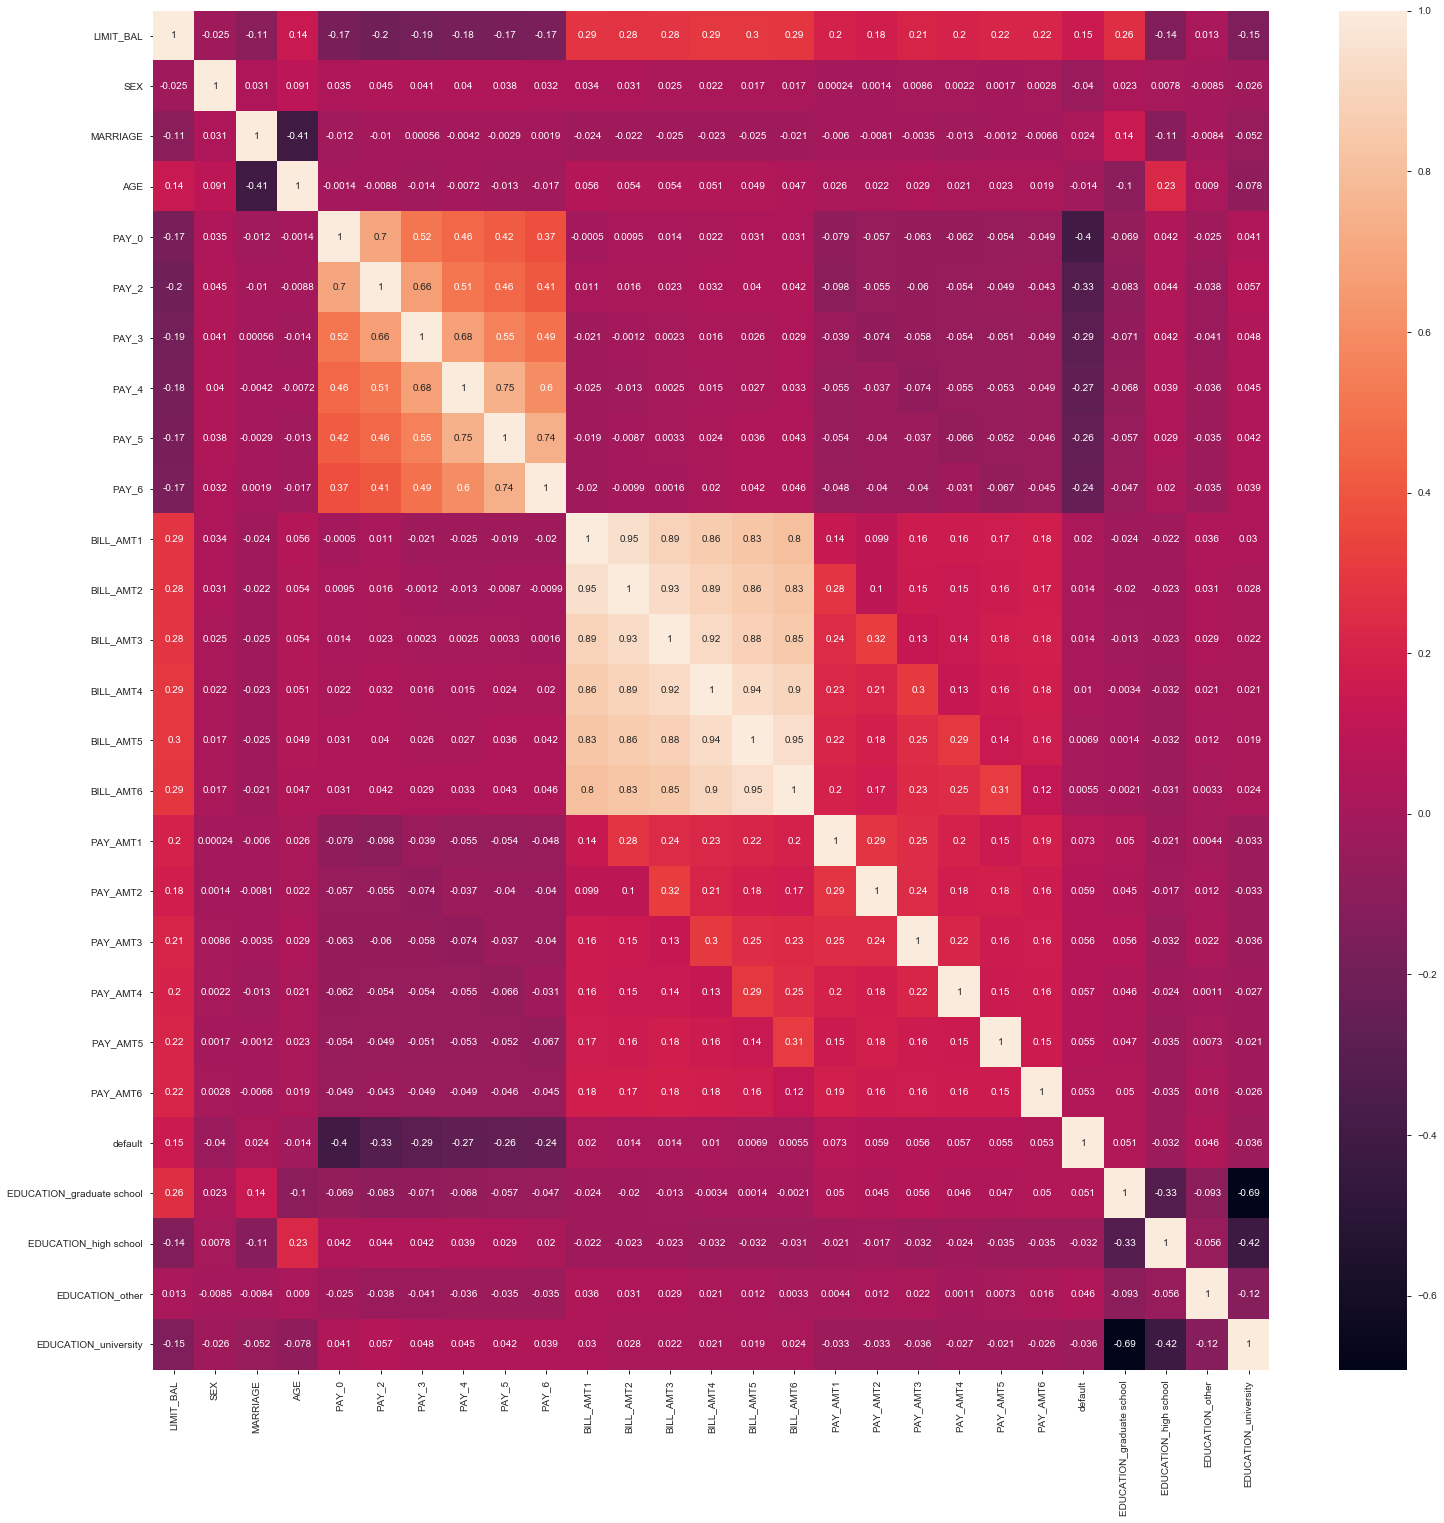

In [127]:
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

In [128]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

In [129]:
credit=credit.drop(['PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6'], axis=1)
credit=credit.drop(['SEX', 'MARRIAGE','EDUCATION_high school', 'EDUCATION_other','EDUCATION_university'], axis=1)
# credit=credit.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6'], axis=1)

In [37]:
# credit=credit.drop(['PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

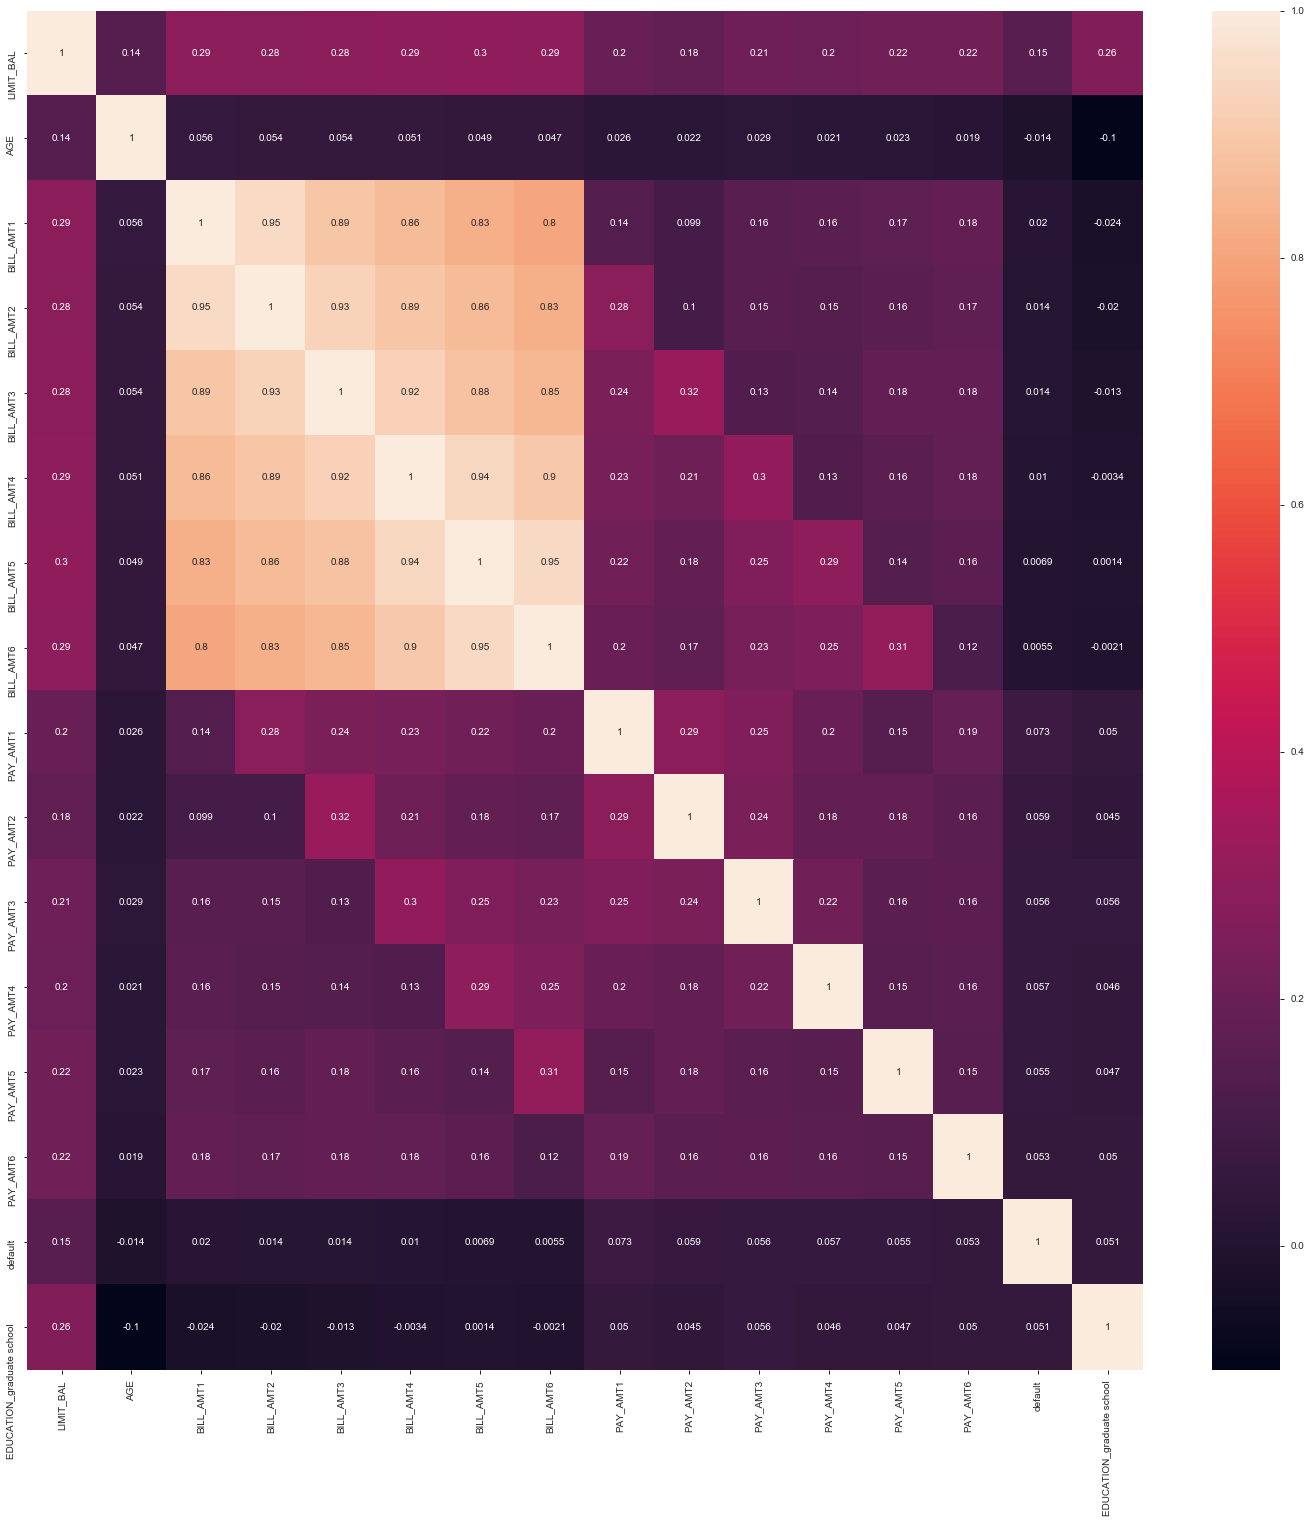

In [130]:
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

In [131]:
credit.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school'],
      dtype='object')

In [40]:
#min_max_scaler = MinMaxScaler()
#credit = min_max_scaler.fit_transform(credit)

In [41]:
#credit=pd.DataFrame(credit)

In [42]:
#credit.head()

In [132]:
credit.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school'],
      dtype='object')

## Build the Model

In [133]:
# features
X = credit.loc[:,['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school']]

In [45]:
# print(X)

In [46]:
# min_max_scaler = MinMaxScaler()

In [47]:
# X = min_max_scaler.fit_transform(X)

In [48]:
# print(X)

In [134]:
print('Summary of feature sample')
X.head()

Summary of feature sample


,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school
0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0
1,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0
2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0
3,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0
4,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0


In [135]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   AGE                        29965 non-null  int64
 1   BILL_AMT1                  29965 non-null  int64
 2   BILL_AMT2                  29965 non-null  int64
 3   BILL_AMT3                  29965 non-null  int64
 4   BILL_AMT4                  29965 non-null  int64
 5   BILL_AMT5                  29965 non-null  int64
 6   BILL_AMT6                  29965 non-null  int64
 7   PAY_AMT1                   29965 non-null  int64
 8   PAY_AMT2                   29965 non-null  int64
 9   PAY_AMT3                   29965 non-null  int64
 10  PAY_AMT4                   29965 non-null  int64
 11  PAY_AMT5                   29965 non-null  int64
 12  PAY_AMT6                   29965 non-null  int64
 13  default                    29965 non-null  int32
 14  EDUCATION_graduate sch

In [136]:
# dependent varaible
y = credit.loc[:,'LIMIT_BAL']

In [52]:
#sc_y = StandardScaler()

In [53]:
#y = sc_y.fit_transform(y)

In [137]:
y.head(3)

0     20000
1    120000
2     90000
Name: LIMIT_BAL, dtype: int64

In [138]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
# algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR(C=10000000, cache_size=2000)))
print(algosClass)

[('Random Forest Regressor', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)), ('Support Vector Regression', SVR(C=10000000, cache_size=2000, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False))]


In [139]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [140]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.45766102329163677
Support Vector Regression 0.30033479312298483


In [141]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [142]:
algo = RandomForestRegressor(n_estimators=200)

In [143]:
model = algo.fit(X_train,y_train)

In [144]:
predictions = model.predict(X_test)

In [145]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [146]:
predRsquared = r2_score(y_test,predictions)

In [147]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.468
RMSE: 94435.280


# Task 3: Build and Evaluate Models Classification

## Import Libraries 

In [65]:
#  classifiers
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

## Reading Dataset using Pandas

In [66]:
credit=pd.read_csv('default of credit card clients.csv', header=1)

## Analysis Data

In [67]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [68]:
credit['default']=credit['default payment next month']

In [69]:
credit=credit.drop(['ID','default payment next month'], axis=1)

In [70]:
credit=credit.drop_duplicates()

In [71]:
null=credit.isnull().sum()
null

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [72]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [73]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29965 non-null  int64 
 1   SEX        29965 non-null  object
 2   EDUCATION  29965 non-null  object
 3   MARRIAGE   29965 non-null  int64 
 4   AGE        29965 non-null  int64 
 5   PAY_0      29965 non-null  int64 
 6   PAY_2      29965 non-null  int64 
 7   PAY_3      29965 non-null  int64 
 8   PAY_4      29965 non-null  int64 
 9   PAY_5      29965 non-null  int64 
 10  PAY_6      29965 non-null  int64 
 11  BILL_AMT1  29965 non-null  int64 
 12  BILL_AMT2  29965 non-null  int64 
 13  BILL_AMT3  29965 non-null  int64 
 14  BILL_AMT4  29965 non-null  int64 
 15  BILL_AMT5  29965 non-null  int64 
 16  BILL_AMT6  29965 non-null  int64 
 17  PAY_AMT1   29965 non-null  int64 
 18  PAY_AMT2   29965 non-null  int64 
 19  PAY_AMT3   29965 non-null  int64 
 20  PAY_AMT4   29965 non-null  i

In [74]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [75]:
le=LabelEncoder()
le.fit(credit[('SEX')])
credit['SEX']=le.transform(credit['SEX'])

In [76]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [77]:
le=LabelEncoder()
le.fit(credit[('default')])
credit['default']=le.transform(credit['default'])

In [78]:
le=LabelEncoder()
le.fit(credit[('EDUCATION')])
credit['EDUCATION']=le.transform(credit['EDUCATION'])

In [79]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.598799,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742
std,129760.135222,0.489128,1.371501,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,0.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000
50%,140000.000000,0.000000,1.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000
75%,240000.000000,1.000000,3.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000
max,1000000.000000,1.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [80]:
credit['PAY_0']=credit['PAY_0'].replace(-2,0)
credit['PAY_2']=credit['PAY_2'].replace(-2,0)
credit['PAY_3']=credit['PAY_3'].replace(-2,0)
credit['PAY_4']=credit['PAY_4'].replace(-2,0)
credit['PAY_5']=credit['PAY_5'].replace(-2,0)
credit['PAY_6']=credit['PAY_6'].replace(-2,0)

In [81]:
credit['PAY_0']=credit['PAY_0'].replace(-1,0)
credit['PAY_2']=credit['PAY_2'].replace(-1,0)
credit['PAY_3']=credit['PAY_3'].replace(-1,0)
credit['PAY_4']=credit['PAY_4'].replace(-1,0)
credit['PAY_5']=credit['PAY_5'].replace(-1,0)
credit['PAY_6']=credit['PAY_6'].replace(-1,0)

In [82]:
credit['LIMIT_BAL'].describe()

count      29965.000000
mean      167442.005006
std       129760.135222
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [83]:
credit['LIMIT_INT'] = pd.cut(credit.LIMIT_BAL, bins=6)

In [84]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_INT
0,20000,0,3,1,24,2,2,0,0,0,...,0,0,0,689,0,0,0,0,0,"(9010.0, 175000.0]"
1,120000,0,3,2,26,0,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,0,"(9010.0, 175000.0]"
2,90000,0,3,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,1,"(9010.0, 175000.0]"
3,50000,0,3,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,1,"(9010.0, 175000.0]"
4,50000,1,3,1,57,0,0,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,1,"(9010.0, 175000.0]"


In [85]:
credit['LIMIT_INT'].describe()

count                  29965
unique                     6
top       (9010.0, 175000.0]
freq                   17611
Name: LIMIT_INT, dtype: object

In [86]:
le=LabelEncoder()
le.fit(credit[('LIMIT_INT')])
credit['LIMIT_INT']=le.transform(credit['LIMIT_INT'])

In [87]:
credit['LIMIT_INT'].describe()

count    29965.000000
mean         0.539863
std          0.722736
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: LIMIT_INT, dtype: float64

In [88]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29965 non-null  int64
 1   SEX        29965 non-null  int32
 2   EDUCATION  29965 non-null  int32
 3   MARRIAGE   29965 non-null  int64
 4   AGE        29965 non-null  int64
 5   PAY_0      29965 non-null  int64
 6   PAY_2      29965 non-null  int64
 7   PAY_3      29965 non-null  int64
 8   PAY_4      29965 non-null  int64
 9   PAY_5      29965 non-null  int64
 10  PAY_6      29965 non-null  int64
 11  BILL_AMT1  29965 non-null  int64
 12  BILL_AMT2  29965 non-null  int64
 13  BILL_AMT3  29965 non-null  int64
 14  BILL_AMT4  29965 non-null  int64
 15  BILL_AMT5  29965 non-null  int64
 16  BILL_AMT6  29965 non-null  int64
 17  PAY_AMT1   29965 non-null  int64
 18  PAY_AMT2   29965 non-null  int64
 19  PAY_AMT3   29965 non-null  int64
 20  PAY_AMT4   29965 non-null  int64
 21  PAY_AMT5   2

In [89]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_INT
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.598799,1.551877,35.487969,0.356416,0.320340,0.304288,0.258935,0.221625,...,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.539863
std,129760.135222,0.489128,1.371501,0.521997,9.219459,0.760752,0.802064,0.790696,0.761200,0.717768,...,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.722736
min,10000.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000
50%,140000.000000,0.000000,1.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000
75%,240000.000000,1.000000,3.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000
max,1000000.000000,1.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,5.000000


## Correlation

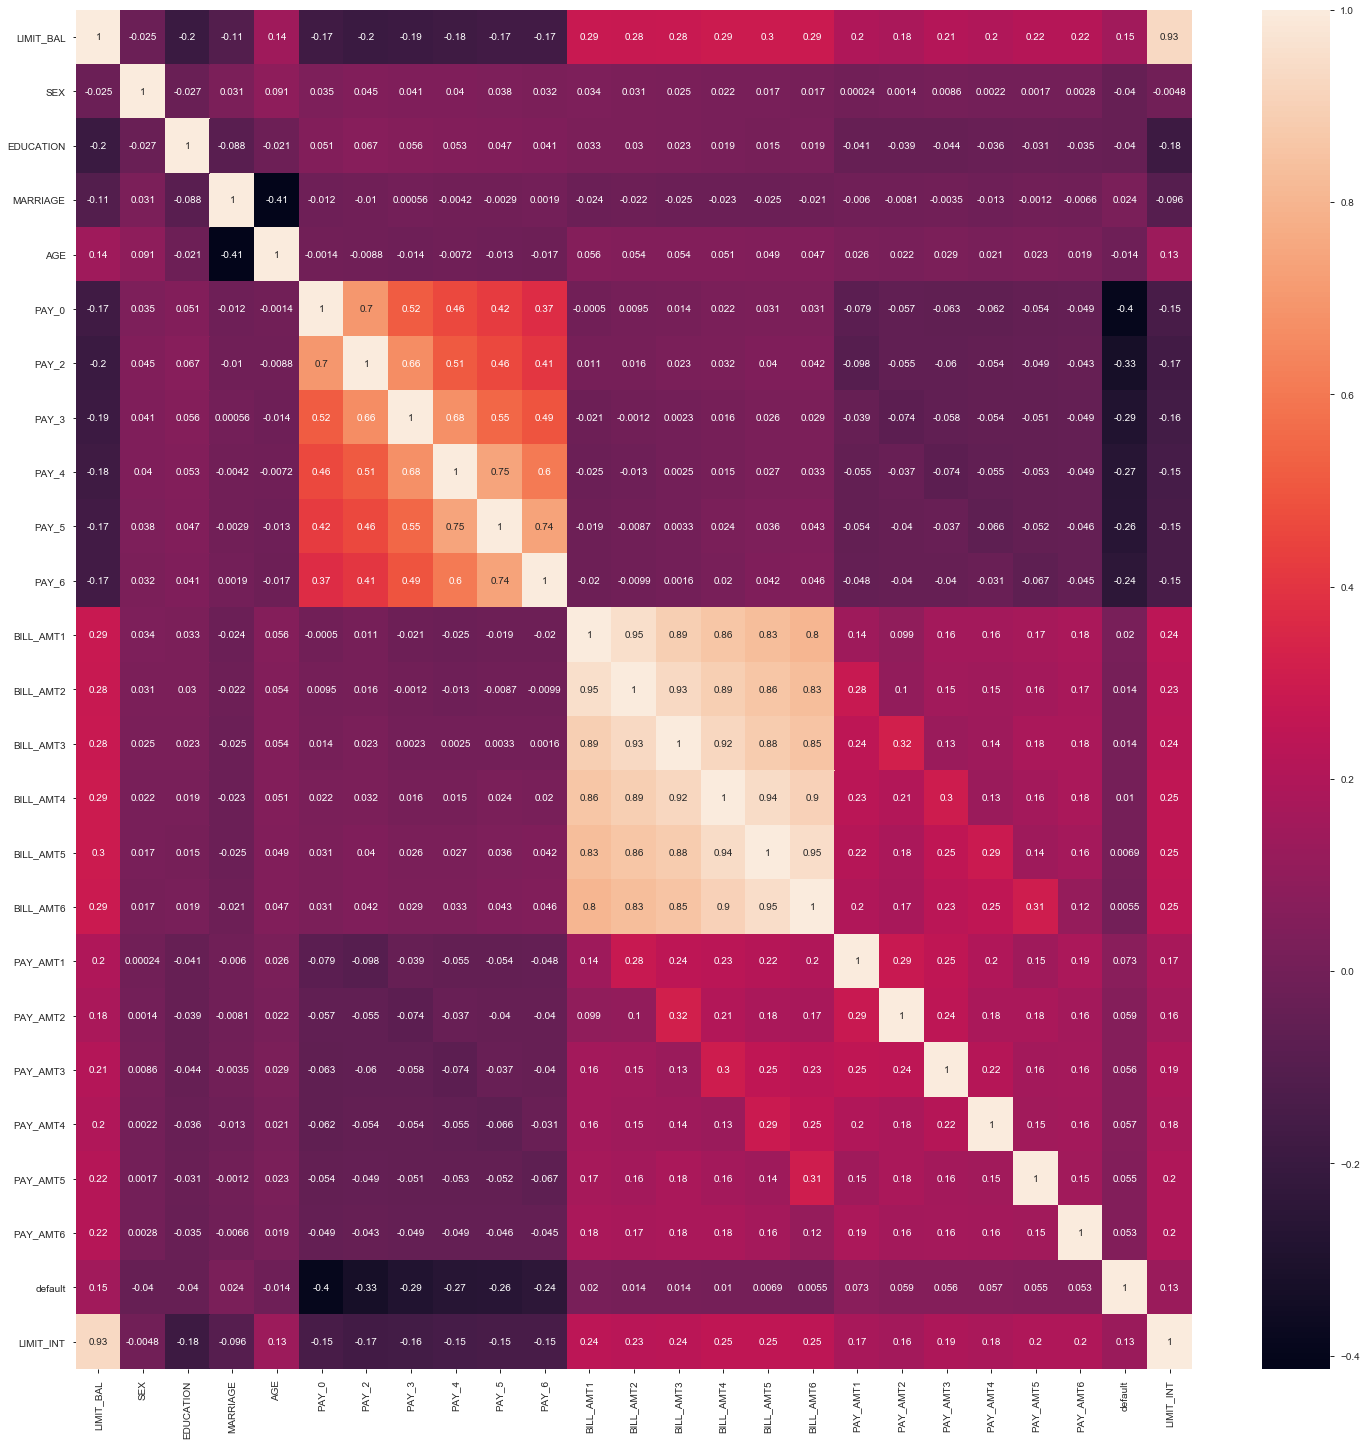

In [90]:
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

In [91]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'LIMIT_INT'],
      dtype='object')

In [92]:
credit=credit.drop(['PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6'], axis=1)
credit=credit.drop(['LIMIT_BAL','SEX', 'MARRIAGE'], axis=1)

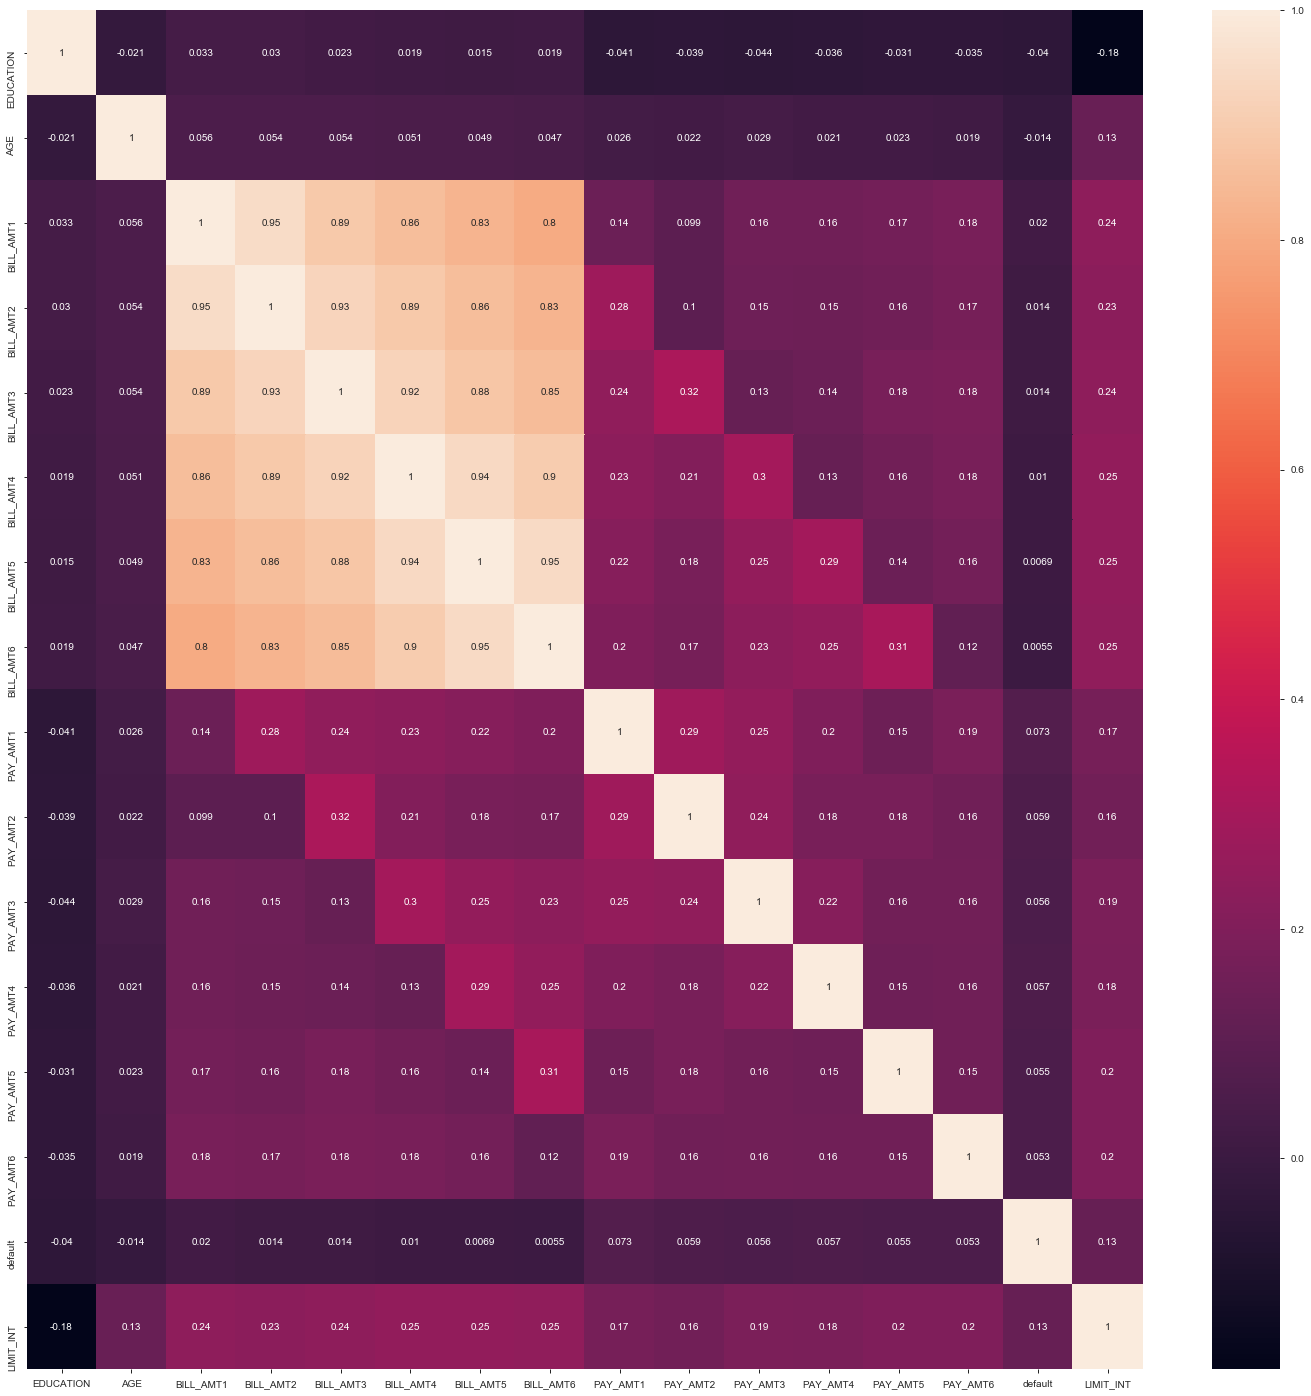

In [93]:
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

In [94]:
credit.columns

Index(['EDUCATION', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'LIMIT_INT'],
      dtype='object')

## Build the Model

In [95]:
# features
X = credit.loc[:,['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']]

In [96]:
print('Summary of feature sample')
X.head()

Summary of feature sample


,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0
1,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [97]:
# dependent varaible
y = credit.loc[:,'LIMIT_INT']

In [98]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: LIMIT_INT, dtype: int32

In [99]:
algos_Class = []
# algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
# algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))
# algos_Class.append(('Suppor Vector Machine',SVC(C=10, gamma=1)))
print(algos_Class)

[('Gradient Boosting Classifier', GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False))]


In [100]:
#regression
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

C:\Users\carlo_000\Anaconda3\envs\Task1\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [101]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Gradient Boosting Classifier 0.6884696647823753


In [102]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [103]:
algo = GradientBoostingClassifier(n_estimators=100)

In [104]:
model = algo.fit(X_train,y_train)

In [105]:
predictions = model.predict(X_test)

In [106]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      5336
           1       0.53      0.56      0.55      2585
           2       0.55      0.16      0.25      1008
           3       0.03      0.02      0.02        50
           4       0.00      0.00      0.00        11

    accuracy                           0.69      8990
   macro avg       0.38      0.32      0.33      8990
weighted avg       0.68      0.69      0.67      8990



In [107]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)

[0.11878566 0.15160239 0.10334593 0.04815296 0.06496855 0.02750708
 0.04045654 0.06584633 0.069542   0.09884703 0.03602733 0.06753901
 0.0943863  0.01299288]


In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE        29965 non-null  int64
 1   BILL_AMT1  29965 non-null  int64
 2   BILL_AMT2  29965 non-null  int64
 3   BILL_AMT3  29965 non-null  int64
 4   BILL_AMT4  29965 non-null  int64
 5   BILL_AMT5  29965 non-null  int64
 6   BILL_AMT6  29965 non-null  int64
 7   PAY_AMT1   29965 non-null  int64
 8   PAY_AMT2   29965 non-null  int64
 9   PAY_AMT3   29965 non-null  int64
 10  PAY_AMT4   29965 non-null  int64
 11  PAY_AMT5   29965 non-null  int64
 12  PAY_AMT6   29965 non-null  int64
 13  default    29965 non-null  int32
dtypes: int32(1), int64(13)
memory usage: 3.3 MB
